In [78]:
import os
import cv2
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.models import Model, load_model

In [79]:
model = load_model('model_moblenet.h5')

In [99]:
def predict_emotion(img):
    dim = (99, 128)
    img_arr = np.empty(shape=(1,128,99,3))
    img_arr[0] = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    label_to_text = {0: 'negative', 1: 'neutral', 2: 'positive'}
    classes = np.argmax(model.predict(img_arr))
    return label_to_text[classes]

def crop_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    faces = faceCascade.detectMultiScale(
            gray
    )

    print("Found {0} Faces!".format(len(faces)))
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        crop_img = img[y:y+h, x:x+w]
    
    return crop_img
    

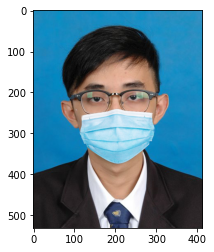

In [100]:
img_tmp = cv2.imread("passport_photo.jpg")
plt.imshow(cv2.cvtColor(img_tmp, cv2.COLOR_BGR2RGB))

Found 1 Faces!


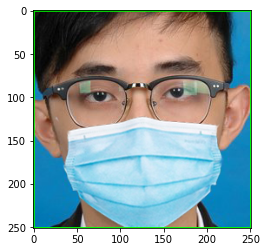

In [101]:
cropped_img = crop_image(img_tmp)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

In [104]:
print("Predicted emotion: " + predict_emotion(cropped_img))

Predicted emotion: positive
